<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/%5BTensorflow%5DHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow HUB

https://tfhub.dev/

### Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow_hub as hub
import os
import zipfile

#### Label

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
labels = []
with open('/content/drive/MyDrive/DeepLearning/대구AI허브/ImageNetLabels.txt') as f:
    labels = f.readlines()

## Resnet

In [10]:
model = keras.Sequential()
model.add(hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v1_152/classification/5', input_shape=(224,224,3))) # Resnet
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              60346281  
                                                                 
Total params: 60,346,281
Trainable params: 0
Non-trainable params: 60,346,281
_________________________________________________________________


### Data preparation

In [11]:
zip = zipfile.ZipFile('/content/drive/MyDrive/DeepLearning/대구AI허브/testImage.zip', 'r')
zip.extractall('testImage')
zip.close()
filenames = os.listdir('testImage')

In [7]:
image = keras.preprocessing.image.load_img('./testImage/06.jpg', target_size=(224, 224))
imageArr = np.array(image)
imageArr = imageArr.reshape(-1, 224, 224, 3)
imageArr = imageArr / 255
imageArr.shape

(1, 224, 224, 3)

### Predict

2 goldfish



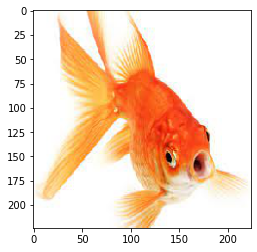

In [12]:
pred = model.predict(imageArr)
index = np.argmax(pred)
print(index, labels[index])
plt.imshow(image)
plt.show()

## Mobile net

In [14]:
model = keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4", input_shape=(224,224,3)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              60346281  
                                                                 
Total params: 60,346,281
Trainable params: 0
Non-trainable params: 60,346,281
_________________________________________________________________


### Data preparation

In [15]:
image = keras.preprocessing.image.load_img('./testImage/03.jpg', target_size=(224, 224))
imageArr = np.array(image)
imageArr = imageArr.reshape(-1, 224, 224, 3)
imageArr = imageArr / 255
imageArr.shape

(1, 224, 224, 3)

### Predict

295 brown bear



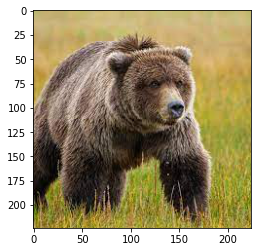

In [16]:
pred = model.predict(imageArr)
index = np.argmax(pred)
print(index, labels[index])
plt.imshow(image)
plt.show()